# Function Transformer 

In [29]:
import numpy as np
import pandas as pd
import scipy.stats as stats

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier,DecisionTreeRegressor

from sklearn.preprocessing import FunctionTransformer
from sklearn.compose import ColumnTransformer

In [3]:
df=pd.read_csv("C:Downloads/Titanic-Dataset.csv",usecols=(['Age','Pclass','Sex',"Fare",'Survived']))

In [4]:
df.head(3)

,Survived,Pclass,Sex,Age,Fare
0,0,3,male,22.0,7.2500
1,1,1,female,38.0,71.2833
2,1,3,female,26.0,7.9250


In [5]:
Age_mean=df['Age'].mean()

In [6]:
df['Age'].fillna(Age_mean,inplace=True)
df['Sex'].replace({'male':0,'female':1},inplace=True)

In [7]:
x=df.iloc[:,1:5]
y=df.iloc[:,0]

In [8]:
df.isna().sum()

Survived    0
Pclass      0
Sex         0
Age         0
Fare        0
dtype: int64

In [9]:
df.head()

,Survived,Pclass,Sex,Age,Fare
0,0,3,0,22.0,7.2500
1,1,1,1,38.0,71.2833
2,1,3,1,26.0,7.9250
3,1,1,1,35.0,53.1000
4,0,3,0,35.0,8.0500


In [10]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42,test_size=0.3)

In [11]:
print(x_train.shape)
print(x_test.shape)

(623, 4)
(268, 4)


D:\python project\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


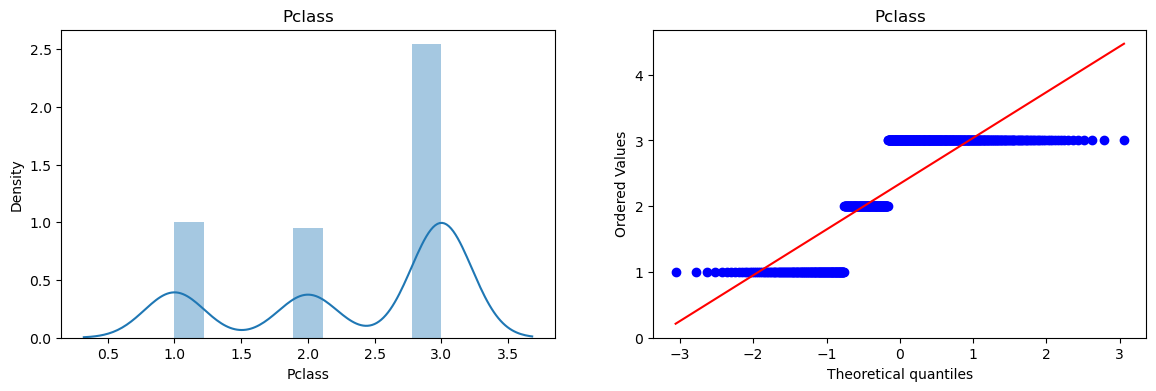

D:\python project\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


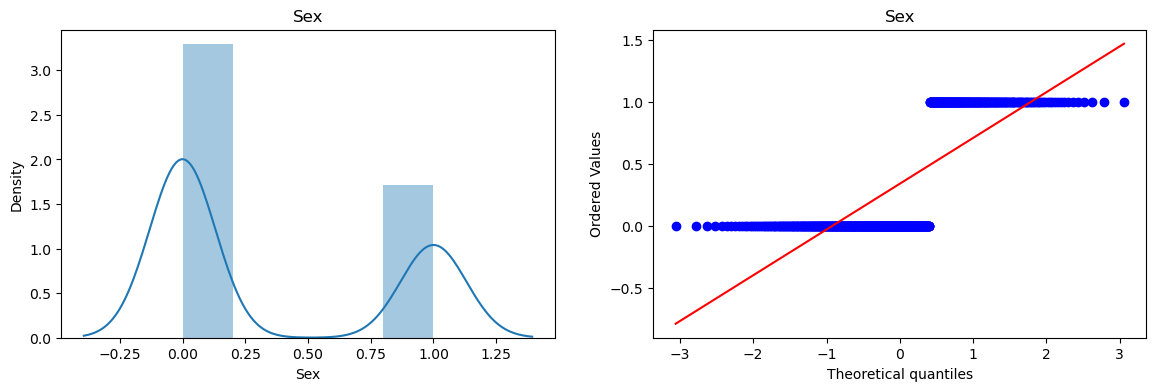

D:\python project\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


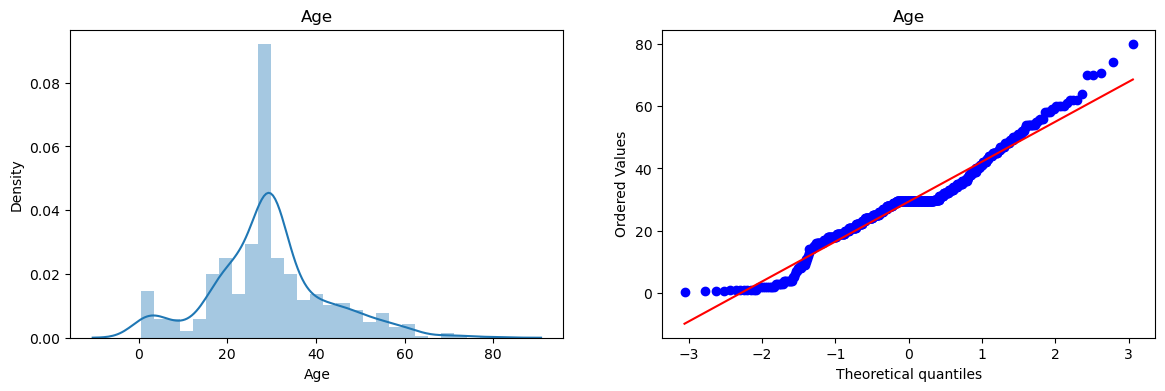

D:\python project\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


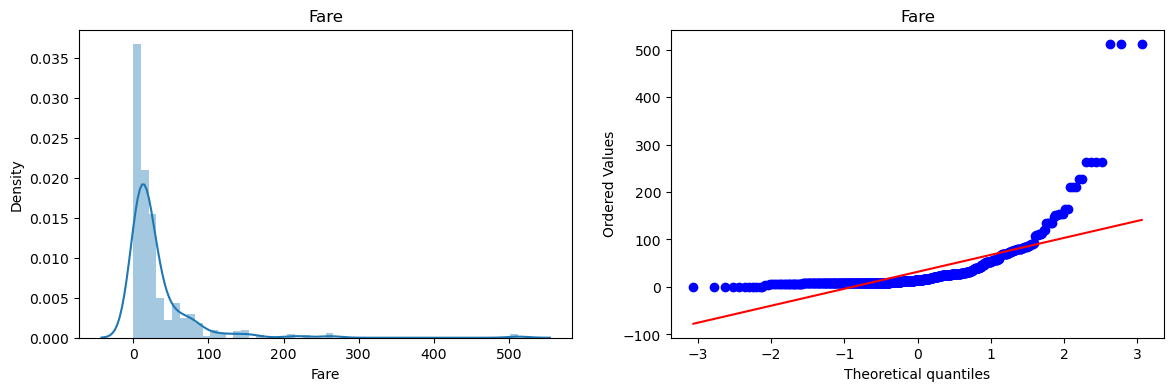

In [12]:
for col in x_train.columns:
    plt.figure(figsize=(14,4))
    plt.subplot(121)
    sns.distplot(x_train[col])
    plt.title(col)

    plt.subplot(122)
    stats.probplot(x_train[col], dist="norm", plot=plt)
    plt.title(col)
    plt.show()

In [13]:
l1=LogisticRegression()
l2=DecisionTreeClassifier()

In [14]:
l1.fit(x_train,y_train)

l2.fit(x_train,y_train)

DecisionTreeClassifier()

In [15]:
y_pred = l1.predict(x_test)
y_pred1 = l2.predict(x_test)
    
print("Accuracy LR befor transformation",accuracy_score(y_test,y_pred))
print("Accuracy DT befor transformation ",accuracy_score(y_test,y_pred1))

Accuracy LR befor transformation 0.7947761194029851
Accuracy DT befor transformation  0.7574626865671642


In [16]:
trf = FunctionTransformer(func=np.sqrt)
x_train_transformed = trf.fit_transform(x_train)
x_test_transformed = trf.transform(x_test)

In [17]:
y_pred = l1.predict(x_test_transformed)
y_pred1 = l2.predict(x_test_transformed)
    
print("Accuracy LR after transform",accuracy_score(y_test,y_pred))
print("Accuracy DT after transform",accuracy_score(y_test,y_pred1))

Accuracy LR after transform 0.7052238805970149
Accuracy DT after transform 0.4552238805970149


In [18]:
x_transformed = trf.fit_transform(x)

clf = LogisticRegression()
clf2 = DecisionTreeClassifier()

print("LR",np.mean(cross_val_score(clf,x_transformed,y,scoring='accuracy',cv=10)))
print("DT",np.mean(cross_val_score(clf2,x_transformed,y,scoring='accuracy',cv=10)))

LR 0.7934706616729089
DT 0.7721847690387016


D:\python project\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


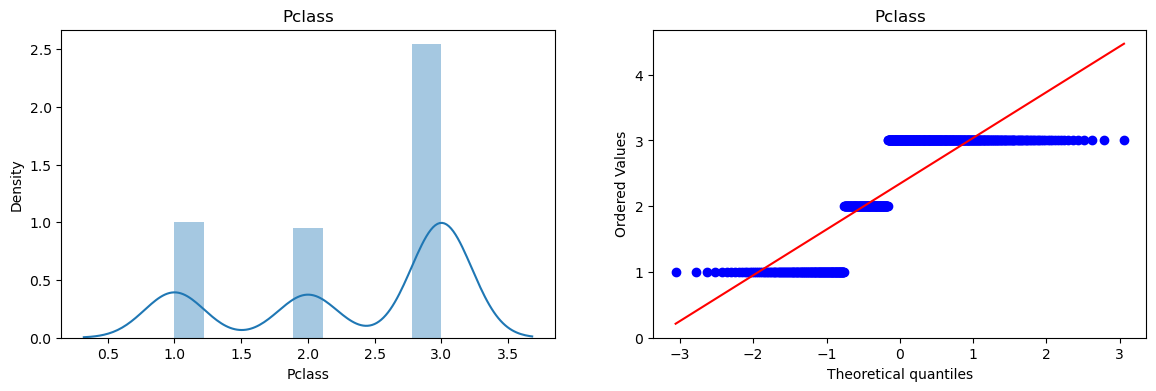

D:\python project\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


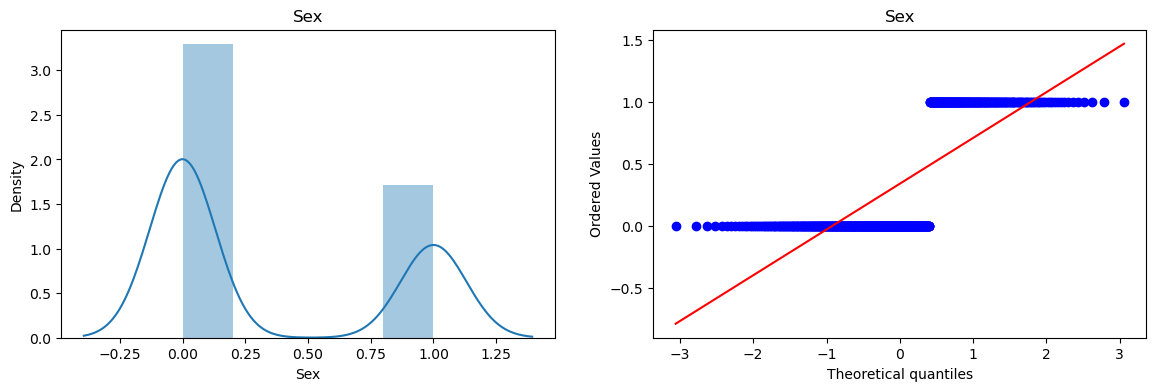

D:\python project\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


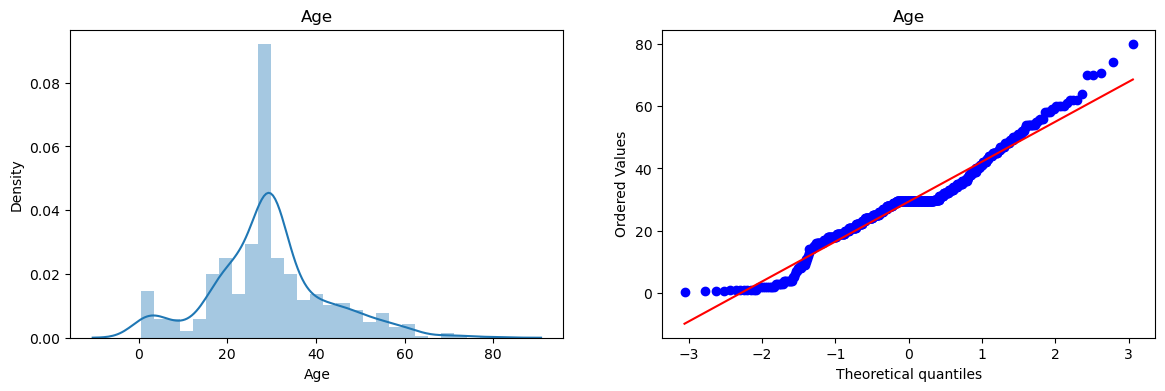

D:\python project\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


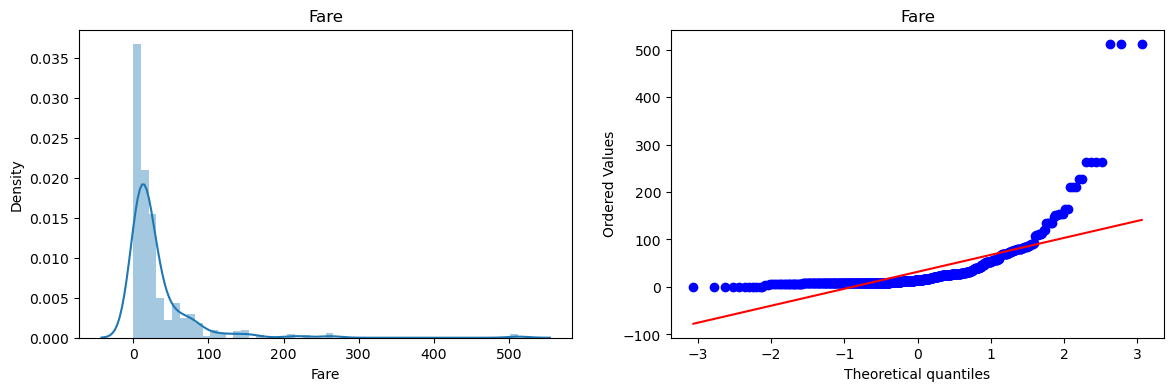

In [19]:
for col in x_train_transformed.columns:
    plt.figure(figsize=(14,4))
    plt.subplot(121)
    sns.distplot(x_train[col])
    plt.title(col)

    plt.subplot(122)
    stats.probplot(x_train[col], dist="norm", plot=plt)
    plt.title(col)

    plt.show()

# Power Transform

In [34]:
#Box_cox transform
from sklearn.preprocessing import PowerTransformer

pt = PowerTransformer(method='box-cox')

X_train_transformed = pt.fit_transform(x_train+0.000001)
X_test_transformed = pt.transform(x_test+0.000001)

pd.DataFrame({'cols':x_train.columns,'box_cox_lambdas':pt.lambdas_}) #it isonly applicable to plclass because accept value greater than zero anf not equal to zero 

,cols,box_cox_lambdas
0,Pclass,1.934626
1,Sex,-0.146435
2,Age,0.853962
3,Fare,0.234974


In [35]:
from sklearn.metrics import r2_score

In [37]:
l1=()
l1.fit(x_train_transformed,y_train)

y_pred2 = l1.predict(x_test_transformed)

r2_score(y_test,y_pred2)

0.18494290468812757

In [24]:
pt = PowerTransformer(method='box-cox')
x_transformed = pt.fit_transform(x+0.0000001)

l1 = LinearRegression()
np.mean(cross_val_score(l1,x_transformed,y,scoring='r2'))

0.36504440334506916

D:\python project\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
D:\python project\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


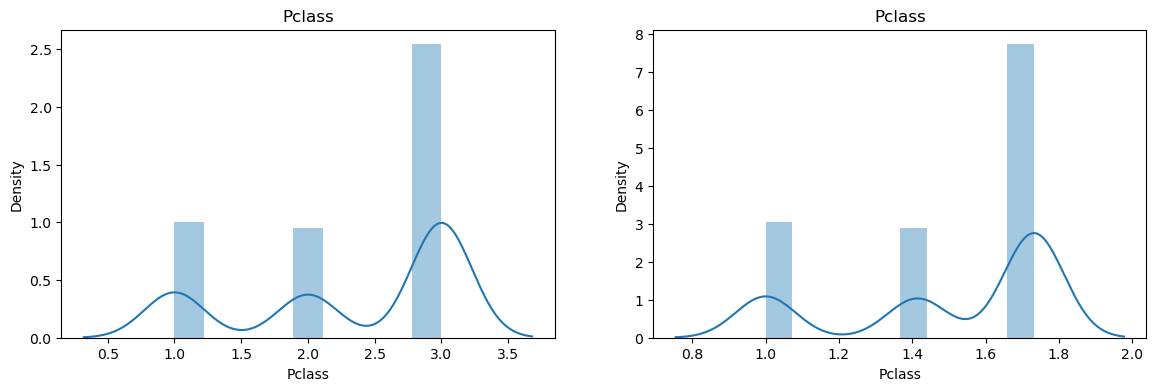

D:\python project\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
D:\python project\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


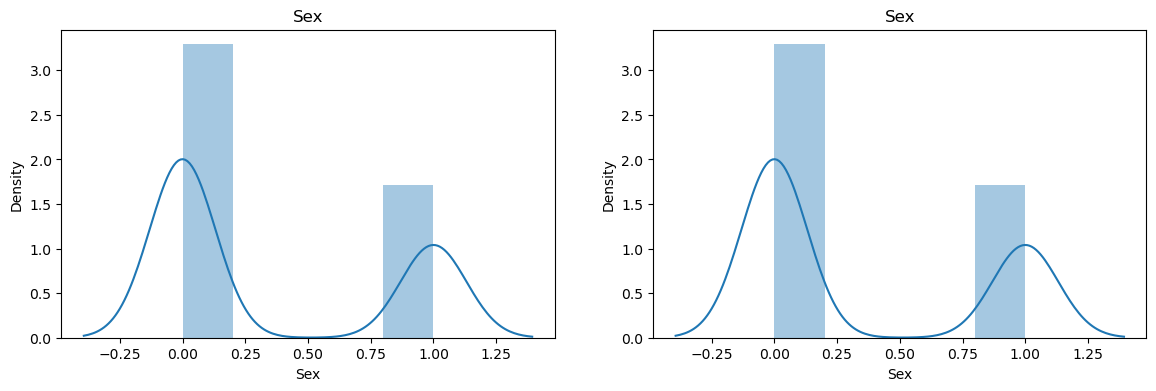

D:\python project\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
D:\python project\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


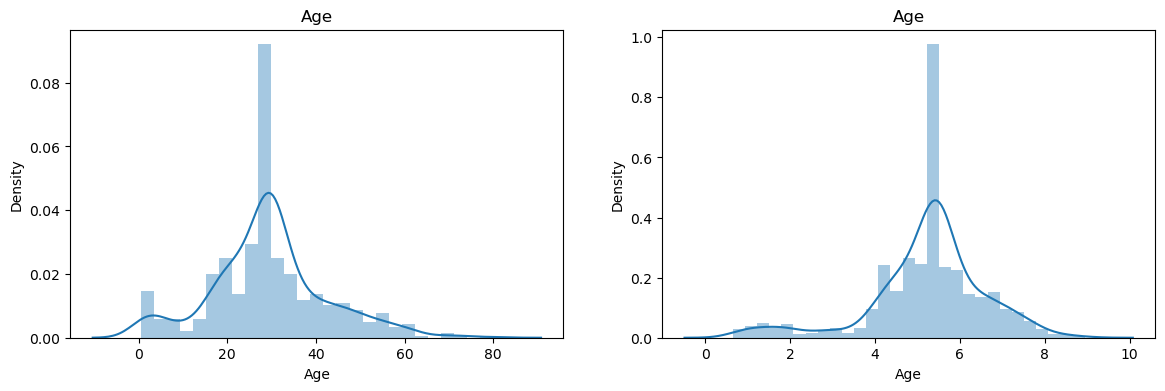

D:\python project\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
D:\python project\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


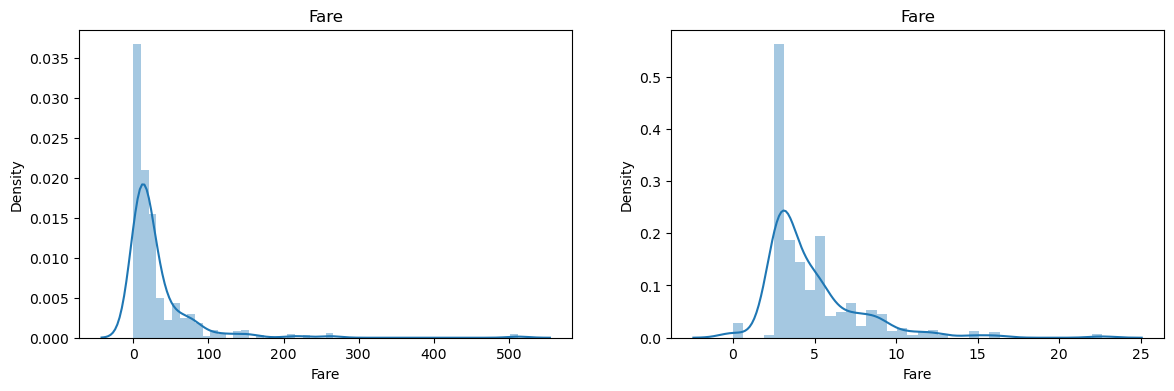

In [25]:
X_train_transformed = pd.DataFrame(x_train_transformed,columns=x_train.columns)

for col in X_train_transformed.columns:
    plt.figure(figsize=(14,4))
    plt.subplot(121)
    sns.distplot(x_train[col])
    plt.title(col)

    plt.subplot(122)
    sns.distplot(x_train_transformed[col])
    plt.title(col)

    plt.show()

In [26]:
#yeo_jhonas transformation
from sklearn.preprocessing import PowerTransformer

pt = PowerTransformer()

X_train_transformed = pt.fit_transform(x_train+0.000001)
X_test_transformed = pt.transform(x_test+0.000001)

pd.DataFrame({'cols':x_train.columns,'yeo_jhons_lambdas':pt.lambdas_})

,cols,yeo_jhons_lambdas
0,Pclass,2.809706
1,Sex,-2.918677
2,Age,0.857208
3,Fare,-0.091071


In [39]:
l1 =DecisionTreeClassifier()
l1.fit(x_train_transformed,y_train)

y_pred2 = l1.predict(x_test_transformed)

r2_score(y_test,y_pred2)

0.01578011132151258

In [40]:
pt = PowerTransformer()
x_transformed = pt.fit_transform(x+0.0000001)

l1 = LinearRegression()
np.mean(cross_val_score(l1,x_transformed,y,scoring='r2'))

0.3640827202207185

D:\python project\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
D:\python project\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


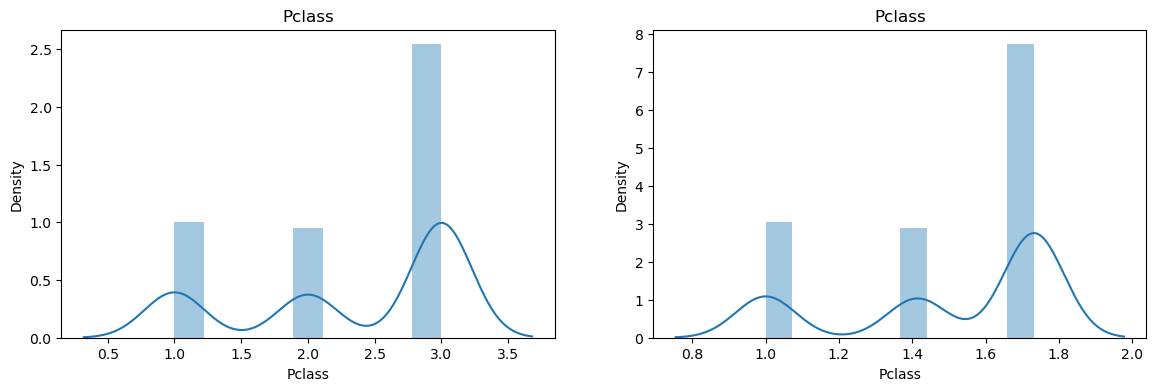

D:\python project\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
D:\python project\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


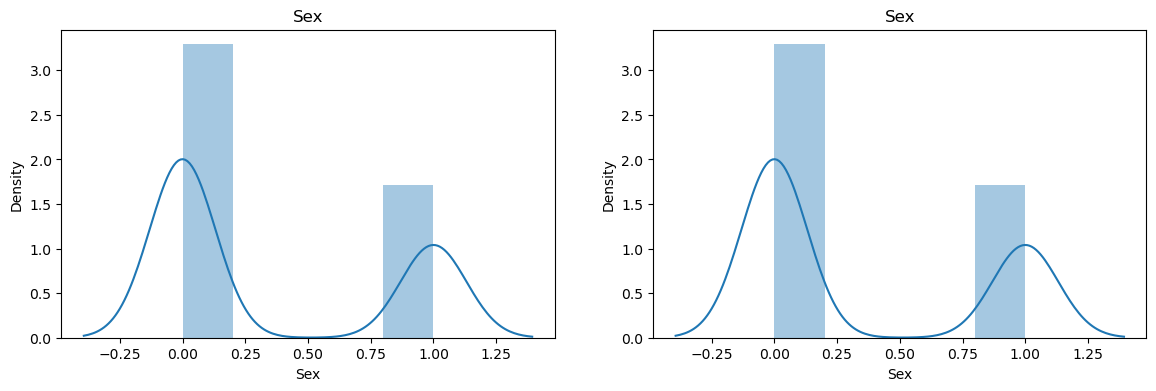

D:\python project\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
D:\python project\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


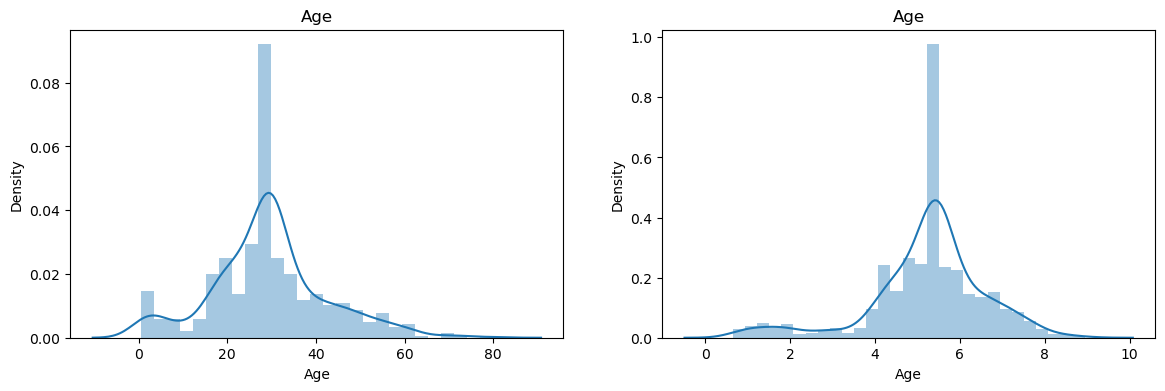

D:\python project\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
D:\python project\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


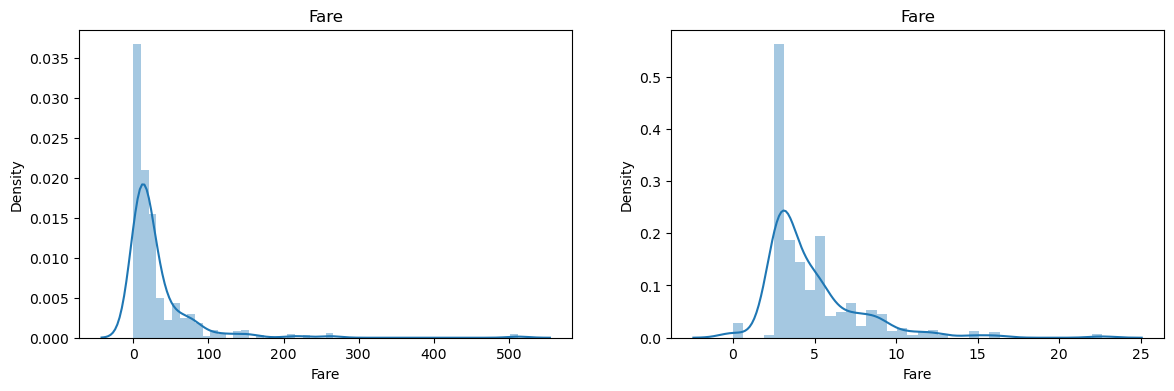

In [41]:
X_train_transformed = pd.DataFrame(x_train_transformed,columns=x_train.columns)

for col in X_train_transformed.columns:
    plt.figure(figsize=(14,4))
    plt.subplot(121)
    sns.distplot(x_train[col])
    plt.title(col)

    plt.subplot(122)
    sns.distplot(x_train_transformed[col])
    plt.title(col)

    plt.show()